# Predicting Terrorism Attack Success Using Machine Learning
---
In this project, we will demonstrate how can we exploit past terrorism incident records using machine learning.
- For dataset, we will use global terrorism database
    - The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 to 2017.
    - The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.
    - The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.
    
---

## Content
1) **Problem Definition**
- Defining goals
- Identifying expected outcomes

2) **Data Collection and Exploration**
- Obtaining data
- Exploring the data

3) **Data Preprocessing**
- Data cleaning
- Feature engineering

4) **Model Design and Development**
- Prediction model
    - Logistic Regression

5) **Model Evaluation and Testing**
- Accuracy
- Precision and recall
- F1-Score
- Confusion matrix

7) **Analysis and Interpretation**
- Identify trends and patterns in the predictions

9) **Iteration and Future Scope**
- Based on feedback, refine models and methods.
- Propose future enhancements

---

## 1. Problem Definition
The objective is to develop machine learning models to analyze historical terrorism data. This model will:
- Predict whether a terror incident succeed or not

This project aims to assist policymakers and security agencies in identifying high-risk areas and potential attack types, enabling more effective resource allocation and prevention strategies.

---

## 2. Data Collection and Exploration
We will use global terrorism database. https://www.start.umd.edu/gtd/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import kagglehub
import os
# Load the GTD dataset

# Download latest version from Kaggle
path = kagglehub.dataset_download("START-UMD/gtd")
print("Path to dataset files:", path)

file_path = os.path.join(path, "globalterrorismdb_0718dist.csv")
data = pd.read_csv(file_path, encoding = 'latin1', low_memory=False)

Path to dataset files: /Users/fako/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print("Dataset Preview: ")
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Dataset Preview: 
Number of rows: 181691
Number of columns: 135


In [5]:
# Replace 'attacktype1_txt' with the exact column name for attack type
unique_attack_types = data['attacktype1_txt'].unique()

# Display all unique attack types
print("Unique attack types:")
for attack_type in unique_attack_types:
    print(attack_type)

Unique attack types:
Assassination
Hostage Taking (Kidnapping)
Bombing/Explosion
Facility/Infrastructure Attack
Armed Assault
Hijacking
Unknown
Unarmed Assault
Hostage Taking (Barricade Incident)


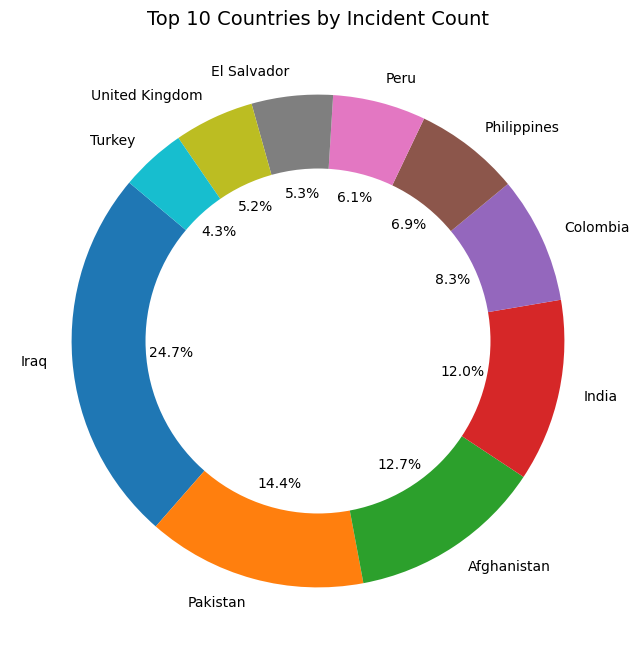

In [6]:
top_countries = data['country_txt'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 10 Countries by Incident Count', fontsize=14)
plt.show()

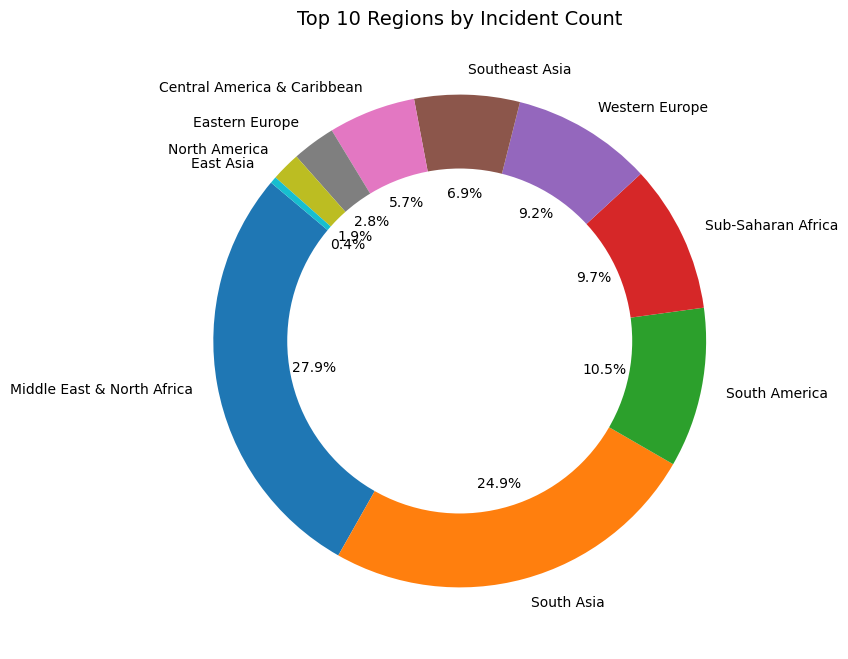

In [7]:
top_regions = data['region_txt'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_regions, labels=top_regions.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Top 10 Regions by Incident Count', fontsize=14)
plt.show()

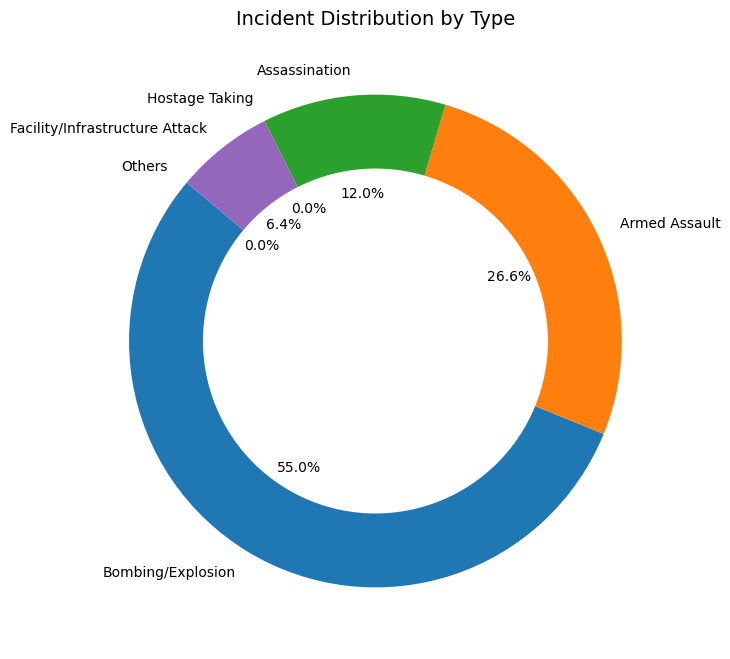

In [8]:
attack_type_counts = data['attacktype1_txt'].value_counts()

labels = ['Bombing/Explosion', 'Armed Assault', 'Assassination',
          'Hostage Taking', 'Facility/Infrastructure Attack', 'Others']

counts = [attack_type_counts[label] if label in attack_type_counts else 0 for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Incident Distribution by Type', fontsize=14)
plt.show()

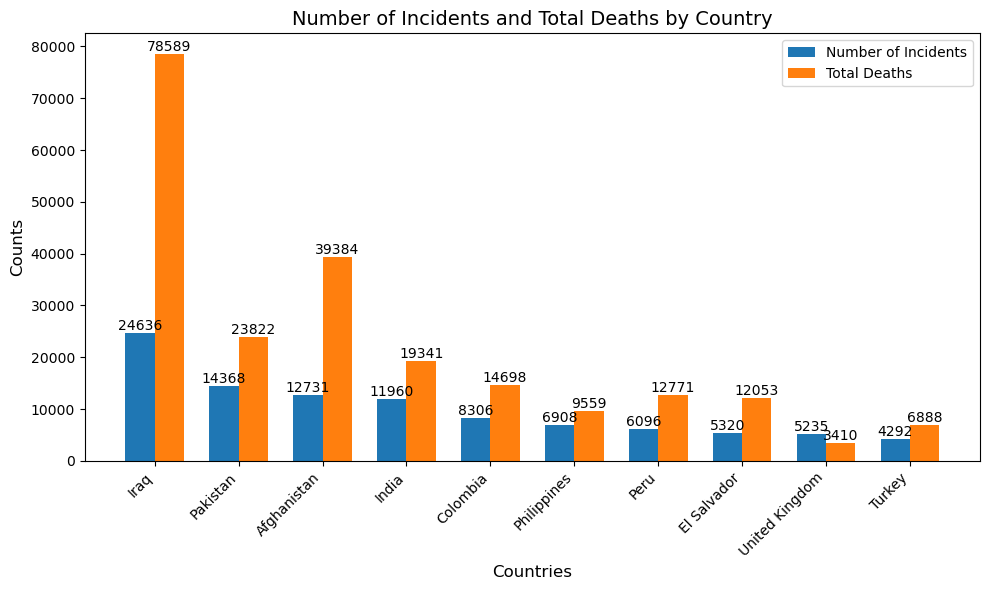

In [9]:
deaths_by_country = data.groupby('country_txt')['nkill'].sum()
incidents_by_country = data['country_txt'].value_counts()

combined_data = pd.DataFrame({
    'Total Deaths': deaths_by_country,
    'Number of Incidents': incidents_by_country
}).fillna(0)

combined_data = combined_data.sort_values('Number of Incidents', ascending=False).head(10)

countries = combined_data.index
deaths = combined_data['Total Deaths']
incidents = combined_data['Number of Incidents']

x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, incidents, width, label='Number of Incidents')
bars2 = ax.bar(x + width/2, deaths, width, label='Total Deaths')

ax.set_xlabel('Countries', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Number of Incidents and Total Deaths by Country', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

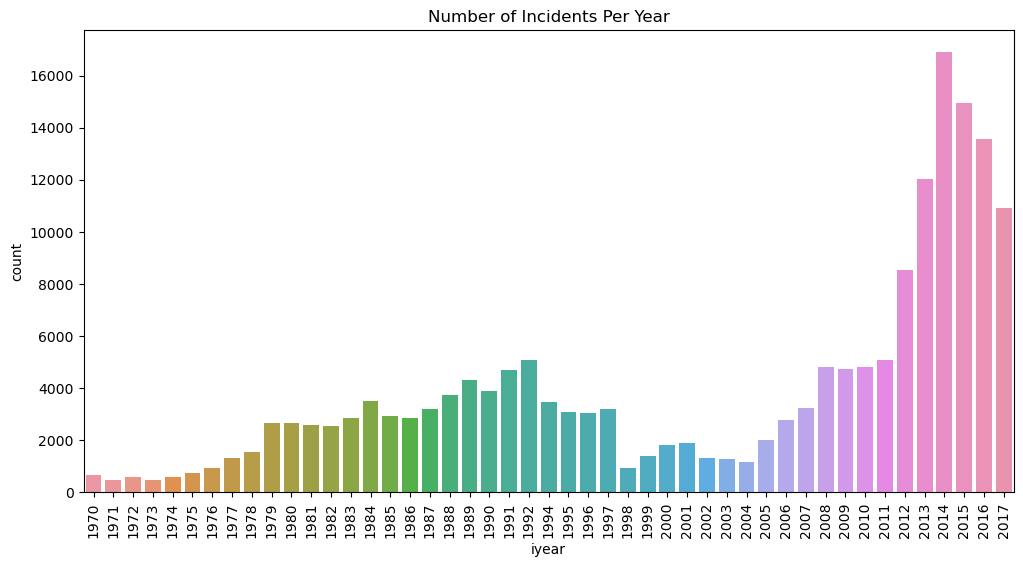

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='iyear', data=data)
plt.title('Number of Incidents Per Year')
plt.xticks(rotation=90)
plt.show()

---
## Data Preprocessing
This section performs these processes:
1) Dropping duplicates
2) Dropping columns that contains more than 40 percent NaN values
3) Removes rows that contains NaN values
3) Dropping rows with 'iyear' as 0
4) Dropping rows with 'imonth' as 0
5) Dropping rows with 'iday' as 0
6) Dropping rows with 'attacktype1_txt' as "Unknown" in place
7) Dropping rows with 'targtype1_txt' as "Unknown" in place
8) Dropping rows with 'gname' as "Unknown" in place
9) Dropping rows with 'weaptype1_txt' as "Unknown" in place
10) Success criterias
11) Encoding categorical features
12) Scaling numerical features

Firstly, let's preview the features

In [11]:
data.shape

(181691, 135)

**Dropping Duplicates**

In [12]:
data = data.drop_duplicates()

data.shape

(181691, 135)

**Dropping columns that contains more than 40 percent NaN values**

In [13]:
missing_values = data.isnull().sum()

# Threshold
threshold = 0.4

# Identify columns to drop
missing_percentage = data.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > threshold].index
data = data.drop(columns=cols_to_drop)

cols_to_drop

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

In [14]:
data.shape

(181691, 58)

**Dropping NaN rows**

In [15]:
features = ['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt',
            'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1',
            'natlty1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound']

data.dropna(subset=features, inplace=True)

data.shape

(163315, 58)

1. **Dropping rows with 'iyear' as 0**
2. **Dropping rows with 'imonth' as 0**
3. **Dropping rows with 'iday' as 0**

In [16]:
data = data[data['iyear'] != 0]
data = data[data['imonth'] != 0]
data = data[data['iday'] != 0]

data.shape

(162635, 58)

1. **Dropping rows with 'attacktype1_txt' as "Unknown" in place**
2. **Dropping rows with 'targtype1_txt' as "Unknown" in place**
3. **Dropping rows with 'gname' as "Unknown" in place**
4. **Dropping rows with 'weaptype1_txt' as "Unknown" in place**

In [17]:
data = data[data['attacktype1_txt'] != "Unknown"]
data = data[data['targtype1_txt'] != "Unknown"]
data = data[data['gname'] != "Unknown"]
data = data[data['weaptype1_txt'] != "Unknown"]

data.shape

(75809, 58)

**Calculate percentages of zero, non-zero and NaN values for features**

In [18]:
columns_to_check = features

for column in columns_to_check:
    if column in data.columns:
        # Total rows in the column
        total_count = data[column].shape[0]

        # Count non-zero values
        nonzero_count = (data[column] != 0).sum()

        # Count zero values
        zero_count = (data[column] == 0).sum()

        # Handle missing values (NaN) if they exist
        nan_count = data[column].isna().sum()

        # Calculate percentages
        nonzero_percentage = (nonzero_count / total_count) * 100
        zero_percentage = (zero_count / total_count) * 100

        print(f"Column '{column}':")
        print(f"  Non-zero percentage: {nonzero_percentage:.2f}%")
        print(f"  Zero percentage: {zero_percentage:.2f}%")
        print(f"  Missing/NaN percentage: {(nan_count / total_count) * 100:.2f}%\n")
    else:
        print(f"Column '{column}' not found in the dataset.")

Column 'iyear':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'imonth':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'iday':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'country':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'country_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'region':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'region_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'attacktype1':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'attacktype1_txt':
  Non-zero percentage: 100.00%
  Zero percentage: 0.00%
  Missing/NaN percentage: 0.00%

Column 'targtype1':
  Non

**Success criterias**

In [19]:
data['is_attack_successful'] = 0

# Define specific rules for each attack type
def check_attack_success(row):
    if row['attacktype1_txt'] == "Assassination":
        if row['nkill'] != 0:
            return 1 # Successful
        else:
            return 0 # Unsuccessful

    elif row['attacktype1_txt'] == "Hostage Taking (Kidnapping)":
        if row['nkill'] == 0 and row['nwound'] < 15:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Armed Assault":
        if row['nkill'] != 0 or row['nwound'] >= 1:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Bombing/Explosion":
        if row['nkill'] != 0 or row['nwound'] >= 15:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Facility/Infrastructure Attack":
        if row['nkill'] != 0 or row['nwound'] >= 15:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Hijacking":
        if row['nkill'] == 0 or row['nwound'] < 15:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Unarmed Assault":
        if row['nkill'] != 0 or row['nwound'] >= 1:
            return 1
        else:
            return 0

    elif row['attacktype1_txt'] == "Hostage Taking (Barricade Incident)":
        if row['nkill'] == 0 and row['nwound'] < 15:
            return 1
        else:
            return 0

    # Default case for other attack types
    return 0

# Apply the custom rules to determine attack success
data['is_attack_successful'] = data.apply(check_attack_success, axis=1)

columns_to_keep = features + ['is_attack_successful']
data = data[columns_to_keep]

**Calculate percentages of zero, non-zero and NaN values for 'is_attack_successful' column**

In [20]:
columns_to_check = ['is_attack_successful']

for column in columns_to_check:
    if column in data.columns:
        # Total rows in the column
        total_count = data[column].shape[0]

        # Count non-zero values
        nonzero_count = (data[column] != 0).sum()

        # Count zero values
        zero_count = (data[column] == 0).sum()

        # Handle missing values (NaN) if they exist
        nan_count = data[column].isna().sum()

        # Calculate percentages
        nonzero_percentage = (nonzero_count / total_count) * 100
        zero_percentage = (zero_count / total_count) * 100

        print(f"Column '{column}':")
        print(f"  Non-zero percentage: {nonzero_percentage:.2f}%")
        print(f"  Zero percentage: {zero_percentage:.2f}%")
        print(f"  Missing/NaN percentage: {(nan_count / total_count) * 100:.2f}%\n")
    else:
        print(f"Column '{column}' not found in the dataset.")

Column 'is_attack_successful':
  Non-zero percentage: 53.42%
  Zero percentage: 46.58%
  Missing/NaN percentage: 0.00%



**Encoding categorical features and scaling numerical features**

We will use one-hot encoding and standart scaler to perform this.

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
X = data[features]
Y = data['is_attack_successful']

numerical_features = [
    'iyear', 'imonth', 'iday', 'country', 'region',
    'attacktype1', 'targtype1', 'natlty1',
    'nkill', 'nwound', 'weaptype1'
]

categorical_features = [
    'country_txt', 'region_txt', 'attacktype1_txt',
    'targtype1_txt', 'natlty1_txt', 'gname',
    'weaptype1_txt'
]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

---
## Model Design and Development
We will use logistic regression as model

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Logistic Regression**

In [25]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=10000, class_weight='balanced'))
])

param_grid = [
    {'logreg__penalty': ['l2'], 'logreg__C': [0.01, 0.1, 1, 10]},
    {'logreg__penalty': [None]}
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

---
## Model Evaluation and Performance Metrics
- Accuracy
- Precision and recall
- F1-Score
- Confusion matrix

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [27]:
Y_pred = best_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7048
           1       0.87      0.85      0.86      8114

    accuracy                           0.85     15162
   macro avg       0.85      0.85      0.85     15162
weighted avg       0.85      0.85      0.85     15162

Confusion Matrix:
 [[5991 1057]
 [1215 6899]]


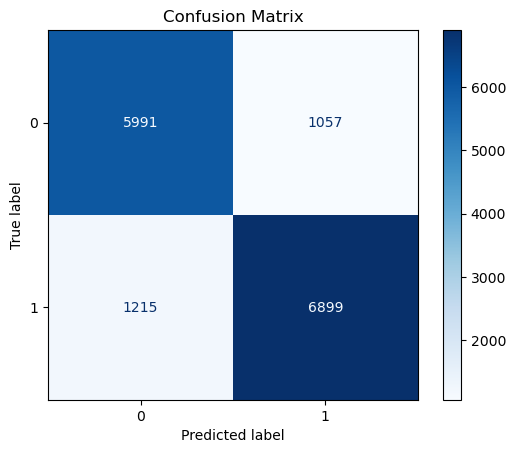

Train Accuracy: 0.86
Test Accuracy: 0.85


In [28]:
def visualize_model_output(y_test, y_pred, model, X_train, y_train):
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    # Train accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    print(f"Train Accuracy: {train_accuracy:.2f}")

    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {test_accuracy:.2f}")

visualize_model_output(Y_test, Y_pred, best_model, X_train, Y_train)

In [29]:
import random

In [30]:
def get_code(text_column, code_column, text_value):
    result = data.loc[data[text_column] == text_value, code_column]
    if not result.empty:
        return result.iloc[0]
    else:
        return None

def get_region_info(country_txt):
    result = data.loc[data['country_txt'] == country_txt, ['region', 'region_txt']]
    if not result.empty:
        region, region_txt = result.iloc[0]  # Get the first matching row
        return int(region), region_txt
    else:
        return None, None

In [31]:
def get_most_active_group_by_country(data):
    """
    Find the most active group for each country in the dataset.
    """
    group_counts = data.groupby(['country_txt', 'gname']).size().reset_index(name='attack_count')

    most_active_groups = group_counts.loc[group_counts.groupby('country_txt')['attack_count'].idxmax()]
    most_active_groups = most_active_groups[['country_txt', 'gname']].set_index('country_txt').to_dict()['gname']

    return most_active_groups

def get_group_preferences(data):
    """
    Extract the most common attack type and weapon type for each group.
    """
    # Group by perpetrator group and calculate most common attack and weapon types
    attack_counts = data.groupby(['gname', 'attacktype1_txt']).size().reset_index(name='attack_count')
    weapon_counts = data.groupby(['gname', 'weaptype1_txt']).size().reset_index(name='weapon_count')

    # Get the most common attack type and weapon type for each group
    most_common_attack = attack_counts.loc[attack_counts.groupby('gname')['attack_count'].idxmax()]
    most_common_weapon = weapon_counts.loc[weapon_counts.groupby('gname')['weapon_count'].idxmax()]

    # Create dictionaries for quick lookups
    group_attack_preferences = most_common_attack.set_index('gname')['attacktype1_txt'].to_dict()
    group_weapon_preferences = most_common_weapon.set_index('gname')['weaptype1_txt'].to_dict()

    return group_attack_preferences, group_weapon_preferences

most_active_groups = get_most_active_group_by_country(data)
group_attack_preferences, group_weapon_preferences = get_group_preferences(data)

In [32]:
def create_realistic_random_attack(data, most_active_groups, group_attack_preferences, group_weapon_preferences):
    """
    Generate a realistic random attack with the most active group's preferences.
    """
    country_txt = random.choice(data['country_txt'].unique())  # Randomly pick a country
    group_name = most_active_groups.get(country_txt, "Unknown")  # Get the most active group or default to "Unknown"

    region_txt = data.loc[data['country_txt'] == country_txt, 'region_txt'].iloc[0]
    attacktype1_txt = group_attack_preferences.get(group_name, random.choice(data['attacktype1_txt'].unique()))
    weaptype1_txt = group_weapon_preferences.get(group_name, random.choice(data['weaptype1_txt'].unique()))
    targtype1_txt = random.choice(data['targtype1_txt'].unique())
    natlty1_txt = country_txt

    return {
        # Numerical features
        'iyear': random.choice(data['iyear'].unique()),
        'imonth': random.choice(data['imonth'].unique()),
        'iday': random.choice(data['iday'].unique()),
        'country': int(get_code('country_txt', 'country', country_txt)),
        'region': int(get_code('region_txt', 'region', region_txt)),
        'attacktype1': int(get_code('attacktype1_txt', 'attacktype1', attacktype1_txt)),
        'targtype1': int(get_code('targtype1_txt', 'targtype1', targtype1_txt)),
        'natlty1': int(get_code('natlty1_txt', 'natlty1', natlty1_txt)),
        'weaptype1': int(get_code('weaptype1_txt', 'weaptype1', weaptype1_txt)),
        'nkill': random.randint(0, 50),
        'nwound': random.randint(0, 50),
        # Categorical features (text)
        'country_txt': country_txt,
        'region_txt': region_txt,
        'attacktype1_txt': attacktype1_txt,
        'targtype1_txt': targtype1_txt,
        'natlty1_txt': natlty1_txt,
        'gname': group_name,
        'weaptype1_txt': weaptype1_txt
    }

# Generate a realistic random attack
realistic_random_attack = create_realistic_random_attack(
    data,
    most_active_groups,
    group_attack_preferences,
    group_weapon_preferences
)

# Create DataFrame for the realistic random attack
realistic_random_attack_df = pd.DataFrame([realistic_random_attack])

# Predict success
prediction = best_model.predict(realistic_random_attack_df)
if prediction[0] == 1:
    print("The realistic random attack is predicted to be successful.")
else:
    print("The realistic random attack is predicted to be unsuccessful.")

# Get probability
probabilities = best_model.predict_proba(realistic_random_attack_df)
success_probability = probabilities[0][1]
print(f"Probability of success: {success_probability:.2f}")

# Display the generated realistic random attack
print("Realistic random attack details:", realistic_random_attack_df)

The realistic random attack is predicted to be successful.
Probability of success: 1.00
Realistic random attack details:    iyear  imonth  iday  country  region  attacktype1  targtype1  natlty1  \
0   1978       7    27      164      10            3          7      164   

   weaptype1  nkill  nwound country_txt                  region_txt  \
0          6     40      26       Qatar  Middle East & North Africa   

     attacktype1_txt            targtype1_txt natlty1_txt             gname  \
0  Bombing/Explosion  Government (Diplomatic)       Qatar  Iraqi extremists   

  weaptype1_txt  
0    Explosives  


---
## Analysis and Interpretation
To evaluate the performance of the prediction model, various performance metrics such as accuracy, precision, recall, F1-score, and confusion matrices were analyzed. Below is the interpretation of the results for **Logistic Regression**
- **Accuracy**: The model achieved an accuracy of 85%, indicating a good overall performance in classification tasks.
- **Class 1 (Positive)**: The F1-score of 0.86 highlights a strong balance between precision (0.87) and recall (0.85), demonstrating the model's robustness in identifying true positives without over-predicting false positives.
- **Class 0 (Negative)**: The F1-score of 0.84 and recall of 0.85 indicate the model's ability to correctly classify true negatives while maintaining reasonable precision (0.83).
- **Misclassifications**: The confusion matrix reveals that 1,218 samples from Class 1 were incorrectly predicted as Class 0, and 1,059 samples from Class 0 were incorrectly predicted as Class 1. While these misclassifications are moderate, they highlight areas for improvement in discriminating between the two classes.

*Trends and Patterns*
- The model achieves consistent performance across both classes, as evidenced by comparable precision, recall, and F1-scores for Classes 0 and 1. This indicates balanced behavior without a significant bias toward any single class.
- The number of incidents per year shows a sharp increase post-2000, peaking in recent years. This temporal trend suggests that predictive accuracy may benefit from focusing on these high-frequency periods.


---
## Future Scope

**Future Scope**

Looking forward, the following enhancements and methodologies can be explored to achieve better results:
- Address Misclassification: Incorporate techniques such as oversampling minority classes, feature engineering, or cost-sensitive learning to reduce false negatives for Class 1 and false positives for Class 0.
- Temporal Features: Introduce temporal patterns into the model to capture recent incident trends, which might enhance predictive accuracy.
- Regional Focus: Given the geographic skewness of incidents, regional stratification in the model evaluation may help tailor improvements for highly affected areas such as Iraq, Pakistan, and Afghanistan.
- Incident Type Analysis: Additional analysis on specific incident types (e.g., Bombing/Explosion) might uncover unique patterns and improve the model's class-specific predictions.

**In conclusion, the model demonstrates strong baseline performance with balanced precision and recall across classes. However, targeted improvements in handling minority misclassifications and leveraging temporal and geographic data could further enhance its effectiveness.**

---
**Group Members**

Ali Emre Pamuk -- 21050111021

Faruk Kaplan -- 21050111026

Mert Altekin -- 21050111065